 # Gray-Scott Model for Reaction-Diffusion in 3-D
 
We implement the Gray-Scott model in three dimensions. This involves adding another dimension to the 2-D grid used in the 2 dimensional case. This extra dimension, however, adds difficulties in computation and visualisation. 

The mathematical model for the three dimensional case is the same as the two dimensional case, where the concentrations of A and B are updated following the system of equations:

$$A' = A + (D_{A}\nabla^{2}A - AB^{2} + f(1-A))\Delta t$$
and
$$B' = B + (D_{b}\nabla^{2}B + AB^{2} - (k+f)B)\Delta t$$

The diffusion operator $\nabla^2$ needs to be modified to three dimensions. This can be done using a 3D kernel. Here, we use an unbiased kernel with a centre value of -1 and surrounding values of 1/26. Other kernels can be used for different results.

Visualisation is done using [Mayavi](https://docs.enthought.com/mayavi/mayavi/) contour3d() function.

In [1]:
#Import relevant libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
from tvtk.api import tvtk
from mayavi import mlab
import math
mlab.init_notebook(backend='png')

Notebook initialized with png backend.


In [2]:
def diffusion_3D(f, k, stoptime, width):
    #da and db = diffusion rates, dt = time step, t = starting time
    da,db,dt,t = .24,.12,1,0

    #3x3x3 kernel for convolution
    kernel = np.array([[[1/26, 1/26, 1/26],[1/26, 1/26, 1/26], [1/26, 1/26, 1/26]],
                     [[1/26, 1/26, 1/26],[1/26, -1, 1/26], [1/26, 1/26, 1/26]],
                     [[1/26, 1/26, 1/26],[1/26, 1/26, 1/26], [1/26, 1/26, 1/26]]])

    #initialise the grid, A=1,  B=0, and C=0
    A = np.ones([width,width,width])
    B = np.zeros([width,width,width])
    C = np.zeros([width,width,width])

    #add small seed area
    x = int(width/2)
    B[x:x+1+int(math.ceil(width/64)),x:x+1+int(math.ceil(width/64)),x:x+1+int(math.ceil(width/64))] = 1

    #update the grid using the diffusion equations
    while t<stoptime:      
        A += (da*ndimage.convolve(A,kernel,mode='reflect',cval=0.0) - A*B**2 + f*(1-A))*dt
        B += (db*ndimage.convolve(B,kernel,mode='reflect',cval=0.0) + A*B**2 - (k+f)*B)*dt
        t +=  dt
    return A, B

**f = 0.0367, k = 0.0649**


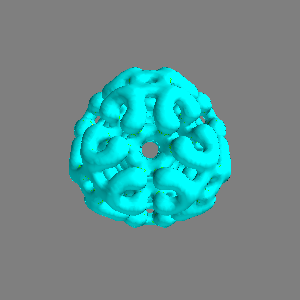

In [3]:
fig = mlab.figure(size=(300,300))
A, B = diffusion_3D(.0367, .0649, 5000, 64)
s = mlab.contour3d(B)
s

**f = 0.032, k = 0.065**


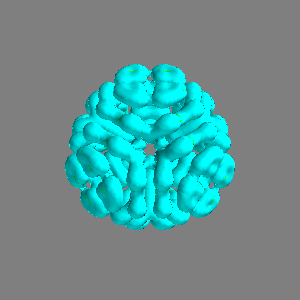

In [22]:
fig = mlab.figure(size=(300,300))
A, B = diffusion_3D(.032, .065, 4500, 64)
s = mlab.contour3d(B)
s